In [7]:
from google.colab import drive
drive.mount('/content/drive')
!pip install japanize_matplotlib -q

from scipy.cluster.hierarchy import dendrogram,ward,centroid
from scipy.spatial import distance
import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
restaurantDfRaw = pd.read_csv('/content/drive/MyDrive/data/restaurant.csv')
restaurantDf = restaurantDfRaw.set_index('店名').drop(['好き', '料理区分'],axis=1)
restaurantDf = scipy.stats.zscore(restaurantDf, ddof=1)

restaurantDf.head(3)

,ランチ価格(円),カロリー,味濃い,見た目,ゆっくり座れる
店名,,,,,
ごんべえ,-0.868461,-1.503886,-0.214800,-0.169876,0.736847
subway,-1.464763,-2.003580,-2.448721,-0.169876,-0.175440
天丼てんや,-1.067228,-0.192190,-0.214800,-1.053228,-0.175440


In [9]:
dist = distance.cdist(restaurantDf, restaurantDf, metric='euclidean')
restaurantDf2 = pd.DataFrame(data = dist, index = list(restaurantDf.index), columns = list(restaurantDf.index))

restaurantDf2.head(3)

,ごんべえ,subway,天丼てんや,四川料理 本格熊猫,やよい軒,どんぴしゃり,ターリー屋,1+Dumpling,麺爺あぶら,武蔵野あぶら学会,...,ティーヌン,十二分屋,うどん蔵之介,らぁ麺やまぐち,末廣ラーメン本舗,揚げ太郎,肉ドレス酒場,天麩羅 えびのや,レッドロック,とんかつ ひなた
ごんべえ,0.000000,2.535338,1.836473,4.306968,2.216211,3.348151,2.925212,2.800920,2.421203,2.577312,...,2.444022,2.015933,1.478495,2.764826,2.577312,2.962495,5.248141,1.980698,3.572039,4.953821
subway,2.535338,0.000000,3.034779,6.382978,2.876041,4.739456,4.965940,4.679437,3.812951,4.033251,...,3.957153,2.451199,2.024249,3.527098,4.033251,4.314200,6.453359,3.617223,5.067765,6.178115
天丼てんや,1.836473,3.034779,0.000000,3.627599,1.542191,2.652525,2.491501,1.997084,1.721078,2.370467,...,1.897121,2.068779,2.697636,3.026352,1.580464,2.146054,5.283532,2.426815,3.505409,4.975443


## Centroid

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:633: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='centroid', metric='euclidean')


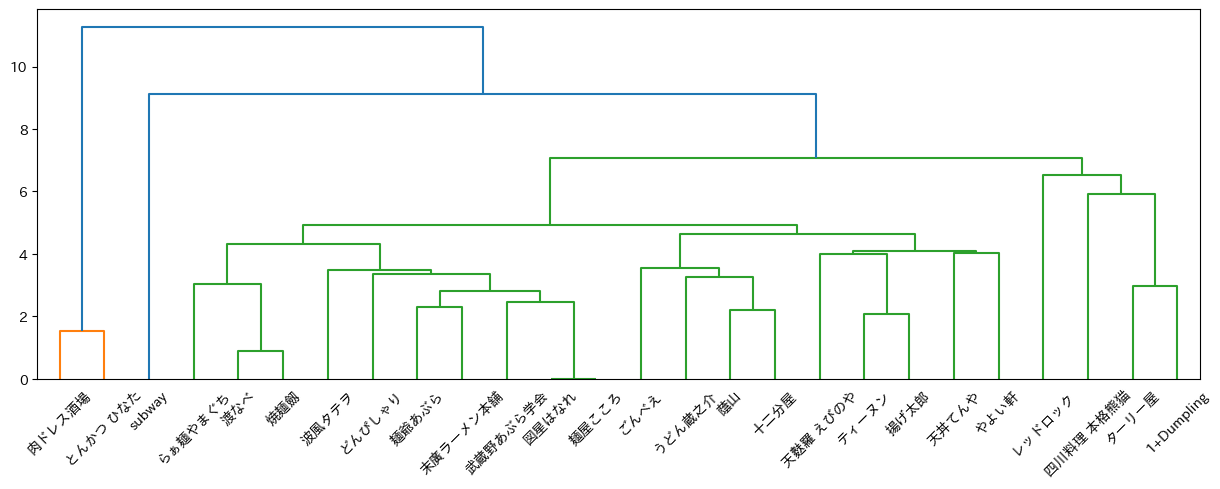

In [10]:
centroidRestaurant = centroid(restaurantDf2)
plt.figure().set_figwidth(15)
dendrogram(centroidRestaurant, labels = restaurantDf2.index)
plt.show()

## Ward

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


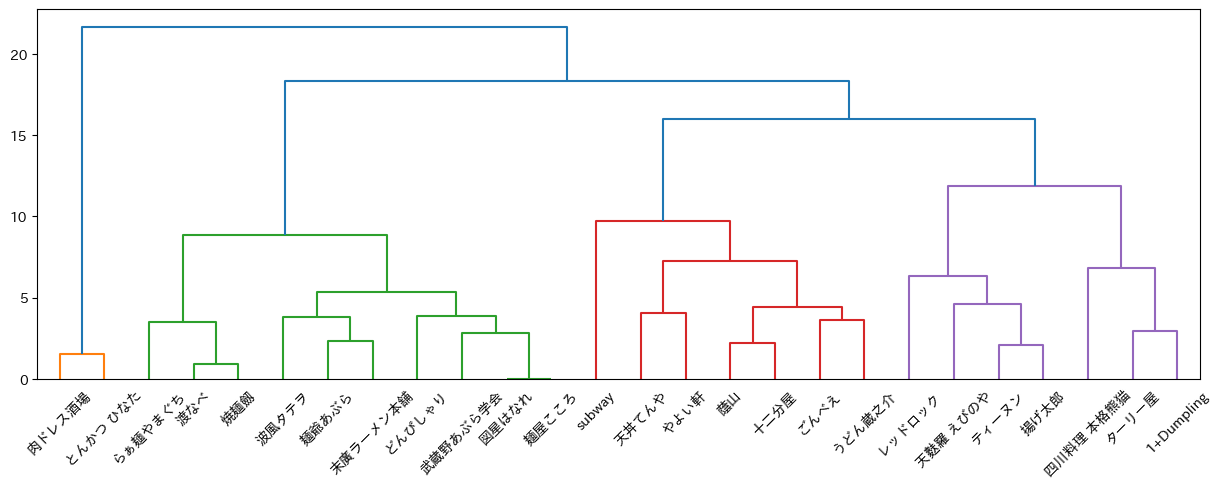

In [11]:
wardRestaurant = ward(restaurantDf2)
plt.figure().set_figwidth(15)
dendrogram(wardRestaurant, labels = restaurantDf2.index)
plt.show()

## Heatmap

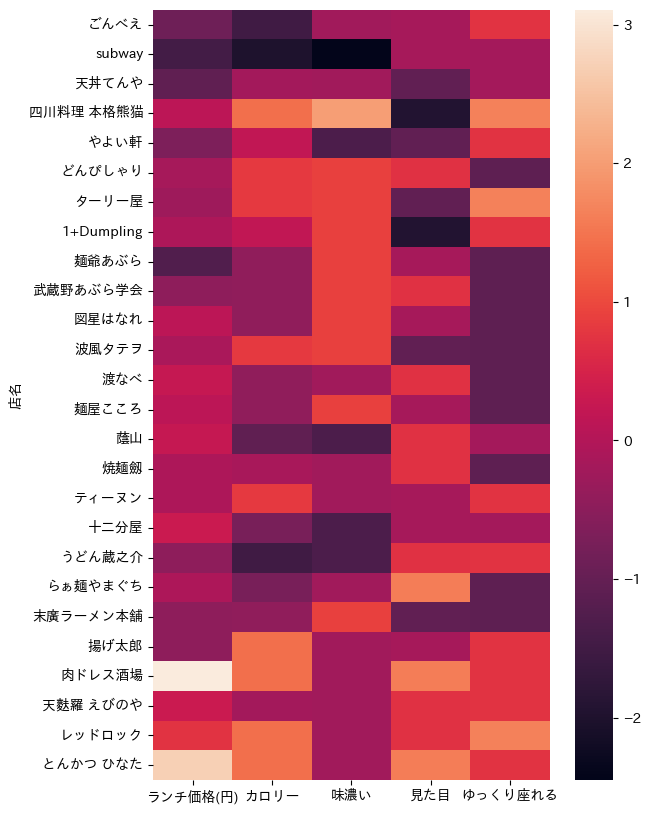

In [12]:
plt.figure().set_figheight(10)
sns.heatmap(restaurantDf)
plt.show()